In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [62]:
from read_data import read_data
from read_data import select_columns
from read_data import change_columns

In [63]:
PATH='susenas12/sn12_ki.csv'

kolom=['URUT', 'NART','B1R1', 'B1R2',
        'B1R5', 'UMUR', 'HB', 'JK', 'KWN',
        'B5R17', 'B5R32', 'B5R33', 'B5R18A',
        'B5R19A', 'B5R19B', 'B5R19C', 'B5R20',
        'EXP_CAP', 'WEIND']

ubah_kolom={'URUT':'identifier_rt',
        'NART': 'individu',
        'B1R1': 'provinsi',
        'B1R2': 'kab_kota',
        'B1R5': 'desa_kota',
        'UMUR': 'umur',
        'HB': 'hubkel',
        'JK': 'jenis_kelamin',
        'KWN': 'status_perkawinan',
        'B5R17': 'ijazah',
        'B5R32': 'umur_kawin',
        'B5R33': 'jml_tahun_kawin',
        'B5R18A': 'pend_3bulan',
        'B5R19A': 'bacatulis_Latin',
        'B5R19B': 'bacatulis_Arab',
        'B5R19C': 'bacatulis_Lainnya',
        'B5R20': 'internet',
        'EXP_CAP': 'exp_cap',
        'WEIND': 'weight'}
        
sus12_ki = read_data(PATH)
sus12_ki=select_columns(sus12_ki,kolom)
sus12_ki=change_columns(sus12_ki,ubah_kolom)

In [64]:
sus12_ki

,identifier_rt,individu,provinsi,kab_kota,desa_kota,umur,hubkel,jenis_kelamin,status_perkawinan,ijazah,umur_kawin,jml_tahun_kawin,pend_3bulan,bacatulis_Latin,bacatulis_Arab,bacatulis_Lainnya,internet,exp_cap,weight
0,110112500101601,1,11,1,1,41,1,1,2,8.0,NaN,NaN,2.0,1.0,1.0,2.0,2.0,3.434643e+05,45.876255
1,110112500101601,2,11,1,1,30,2,2,2,8.0,23.0,7.0,2.0,1.0,1.0,2.0,2.0,3.434643e+05,45.876255
2,110112500101601,3,11,1,1,5,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,3.434643e+05,45.876255
3,110112500101601,4,11,1,1,0,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255
4,110112500101602,1,11,1,1,35,1,1,2,5.0,NaN,NaN,2.0,1.0,1.0,2.0,2.0,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,2,94,71,2,37,2,2,2,8.0,25.0,12.0,1.0,1.0,2.0,1.0,1.0,1.348310e+06,6.000000
1114441,947122001103810,3,94,71,2,10,3,1,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000
1114442,947122001103810,4,94,71,2,9,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000
1114443,947122001103810,5,94,71,2,46,7,2,1,5.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000


In [65]:
sus12_ki.duplicated().sum()

0

In [7]:
categorical_columns = ['provinsi',
                        'kab_kota',
                        'desa_kota',
                        'hubkel',
                        'jenis_kelamin',
                        'status_perkawinan',
                        'ijazah',
                        'pend_3bulan',
                        'bacatulis_Latin',
                        'bacatulis_Arab',
                        'bacatulis_Lainnya',
                        'internet']

In [8]:
numerical_columns = ['identifier_rt',
                     'individu',
                     'umur',
                     'umur_kawin',
                     'jml_tahun_kawin',
                     'exp_cap',
                     'weight']

In [9]:
categorical_columns

['provinsi',
 'kab_kota',
 'desa_kota',
 'hubkel',
 'jenis_kelamin',
 'status_perkawinan',
 'ijazah',
 'pend_3bulan',
 'bacatulis_Latin',
 'bacatulis_Arab',
 'bacatulis_Lainnya',
 'internet']

In [10]:
numerical_columns

['identifier_rt',
 'individu',
 'umur',
 'umur_kawin',
 'jml_tahun_kawin',
 'exp_cap',
 'weight']

In [11]:
def separate_dtype(dataset,
                   categorical_columns,
                   numerical_columns):

    numerical = dataset[numerical_columns].copy()
    categorical = dataset[categorical_columns].copy()
    
    return numerical, categorical

In [12]:
num_data, cat_data = separate_dtype(sus12_ki,
                                    categorical_columns,
                                    numerical_columns)

In [13]:
num_data

,identifier_rt,individu,umur,umur_kawin,jml_tahun_kawin,exp_cap,weight
0,110112500101601,1,41,NaN,NaN,3.434643e+05,45.876255
1,110112500101601,2,30,23.0,7.0,3.434643e+05,45.876255
2,110112500101601,3,5,NaN,NaN,3.434643e+05,45.876255
3,110112500101601,4,0,NaN,NaN,3.434643e+05,45.876255
4,110112500101602,1,35,NaN,NaN,5.703095e+05,55.252186
...,...,...,...,...,...,...,...
1114440,947122001103810,2,37,25.0,12.0,1.348310e+06,6.000000
1114441,947122001103810,3,10,NaN,NaN,1.348310e+06,6.000000
1114442,947122001103810,4,9,NaN,NaN,1.348310e+06,6.000000
1114443,947122001103810,5,46,NaN,NaN,1.348310e+06,6.000000


In [14]:
cat_data

,provinsi,kab_kota,desa_kota,hubkel,jenis_kelamin,status_perkawinan,ijazah,pend_3bulan,bacatulis_Latin,bacatulis_Arab,bacatulis_Lainnya,internet
0,11,1,1,1,1,2,8.0,2.0,1.0,1.0,2.0,2.0
1,11,1,1,2,2,2,8.0,2.0,1.0,1.0,2.0,2.0
2,11,1,1,3,2,1,1.0,1.0,1.0,2.0,2.0,2.0
3,11,1,1,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1,1,1,1,2,5.0,2.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,94,71,2,2,2,2,8.0,1.0,1.0,2.0,1.0,1.0
1114441,94,71,2,3,1,1,1.0,1.0,1.0,2.0,2.0,2.0
1114442,94,71,2,3,2,1,1.0,1.0,1.0,2.0,2.0,2.0
1114443,94,71,2,7,2,1,5.0,2.0,1.0,2.0,2.0,2.0


In [15]:
num_data.isnull().sum()

identifier_rt           0
individu                0
umur                    0
umur_kawin         796654
jml_tahun_kawin    796654
exp_cap                 0
weight                  0
dtype: int64

In [16]:
cat_data.isnull().sum()

provinsi                  0
kab_kota                  0
desa_kota                 0
hubkel                    0
jenis_kelamin             0
status_perkawinan         0
ijazah               190644
pend_3bulan          190644
bacatulis_Latin      102718
bacatulis_Arab       102718
bacatulis_Lainnya    102718
internet             102718
dtype: int64

In [73]:
label='susenas12/label_ki12.csv'

In [77]:
labelki=read_data(label)
labelki.set_index(['Value', 'No'])

Label
Value             No                
provinsi          11            Aceh
                  12  Sumatera Utara
                  13  Sumatera Barat
                  14            Riau
                  15           Jambi
...                              ...
bacatulis_Arab    2            Tidak
bacatulis_Lainnya 1               Ya
                  2            Tidak
internet          1               Ya
                  2            Tidak

[77 rows x 1 columns]

In [17]:
def plot_dist(variable_name):
    sns.distplot(num_data[variable_name])

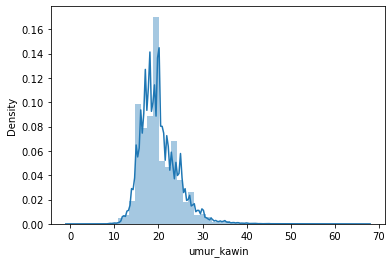

In [18]:
plot_dist('umur_kawin')

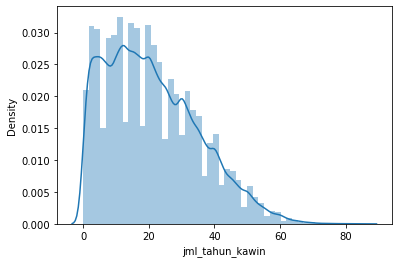

In [19]:
plot_dist('jml_tahun_kawin')

<AxesSubplot:xlabel='umur_kawin'>

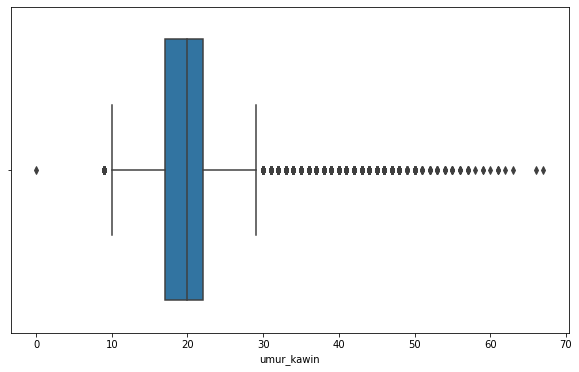

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(num_data.umur_kawin)

<AxesSubplot:xlabel='jml_tahun_kawin'>

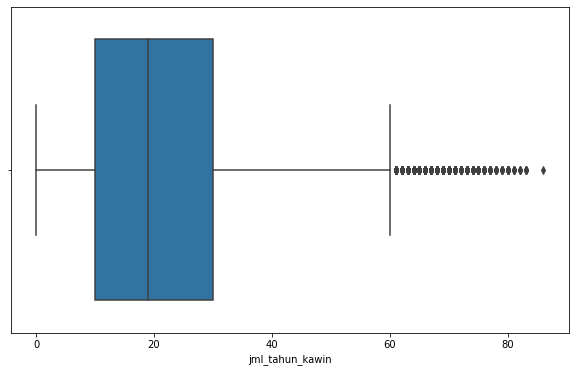

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(num_data.jml_tahun_kawin)

In [22]:
num_data.shape

(1114445, 7)

In [23]:
num_data_empty = num_data.dropna(axis=0)

In [24]:
num_data_empty

,identifier_rt,individu,umur,umur_kawin,jml_tahun_kawin,exp_cap,weight
1,110112500101601,2,30,23.0,7.0,3.434643e+05,45.876255
5,110112500101602,2,33,22.0,11.0,5.703095e+05,55.252186
9,110112500101603,2,46,35.0,10.0,1.305774e+06,20.006414
13,110112500101604,2,36,20.0,16.0,4.017619e+05,42.398369
19,110112500101605,2,31,25.0,6.0,7.000714e+05,43.420265
...,...,...,...,...,...,...,...
1114421,947122001103806,2,33,22.0,11.0,1.648210e+06,438.129364
1114426,947122001103807,2,42,22.0,19.0,1.959000e+06,321.015991
1114431,947122001103808,2,34,25.0,9.0,2.233357e+06,324.770111
1114433,947122001103809,2,39,19.0,20.0,7.117279e+05,14.112268


In [25]:
num_data_empty.shape

(317791, 7)

In [26]:
def plot_dist2(variable_name):
    sns.distplot(num_data_empty[variable_name])

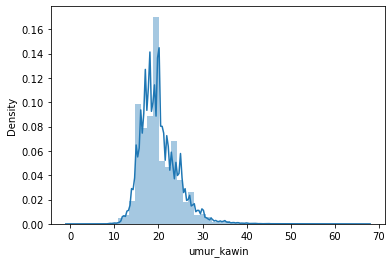

In [27]:
plot_dist2('umur_kawin')

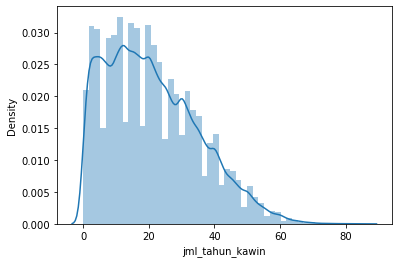

In [28]:
plot_dist2('jml_tahun_kawin')

<AxesSubplot:xlabel='umur_kawin'>

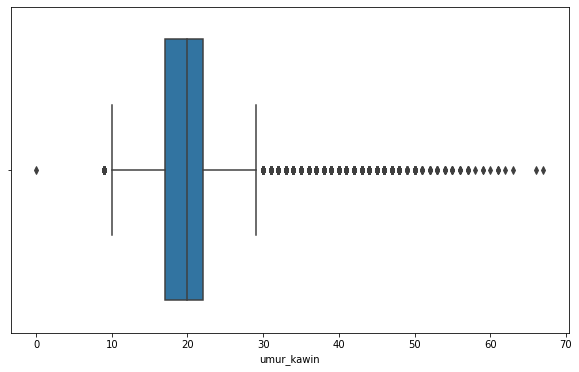

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(num_data_empty.umur_kawin)

<AxesSubplot:xlabel='jml_tahun_kawin'>

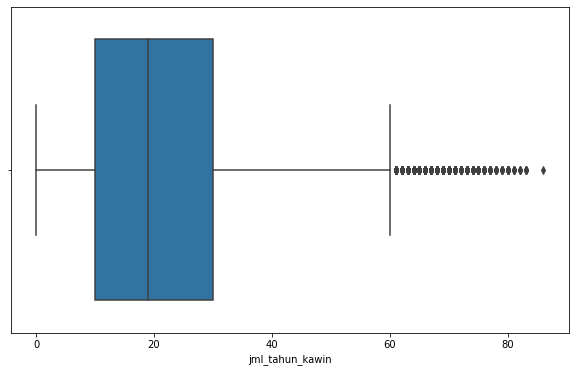

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(num_data_empty.jml_tahun_kawin)

In [31]:
num_data_empty.isnull().sum()

identifier_rt      0
individu           0
umur               0
umur_kawin         0
jml_tahun_kawin    0
exp_cap            0
weight             0
dtype: int64

In [32]:
num_data_emptyq = num_data_empty[num_data_empty['umur_kawin']<18.0]
num_data_emptyq

,identifier_rt,individu,umur,umur_kawin,jml_tahun_kawin,exp_cap,weight
26,110112500101607,2,32,16.0,16.0,3.619762e+05,66.062210
51,110112500108203,2,37,17.0,20.0,2.762830e+05,64.323265
74,110112500108207,2,36,17.0,19.0,3.365405e+05,50.752403
86,110112500108209,2,35,16.0,19.0,3.060769e+05,64.323265
110,110112500202406,2,34,17.0,17.0,1.175712e+06,31.588346
...,...,...,...,...,...,...,...
1114349,947122000602406,2,36,16.0,20.0,3.834921e+05,343.949554
1114360,947122000602408,1,30,17.0,13.0,8.845952e+05,6.000000
1114371,947122000902601,2,45,15.0,30.0,1.266143e+06,60.124115
1114382,947122000902604,4,65,16.0,41.0,6.925476e+05,33.320774


In [33]:
num_data_emptyq.shape

(89071, 7)

In [34]:
total_pop=num_data_emptyq['weight'].sum()
print('{:,.0f}'.format(total_pop))

22,018,942


In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imput = SimpleImputer(missing_values=np.nan,
                     strategy="median")

In [29]:
imput.fit(num_data)

SimpleImputer(strategy='median')

In [31]:
a = imput.fit_transform(num_data)

In [32]:
a = pd.DataFrame(a)
a.columns = num_data.columns

In [33]:
a

,identifier_rt,individu,umur,umur_kawin,jml_tahun_kawin,exp_cap,weight
0,1.101125e+14,1.0,41.0,20.0,19.0,3.434643e+05,45.876255
1,1.101125e+14,2.0,30.0,23.0,7.0,3.434643e+05,45.876255
2,1.101125e+14,3.0,5.0,20.0,19.0,3.434643e+05,45.876255
3,1.101125e+14,4.0,0.0,20.0,19.0,3.434643e+05,45.876255
4,1.101125e+14,1.0,35.0,20.0,19.0,5.703095e+05,55.252186
...,...,...,...,...,...,...,...
1114440,9.471220e+14,2.0,37.0,25.0,12.0,1.348310e+06,6.000000
1114441,9.471220e+14,3.0,10.0,20.0,19.0,1.348310e+06,6.000000
1114442,9.471220e+14,4.0,9.0,20.0,19.0,1.348310e+06,6.000000
1114443,9.471220e+14,5.0,46.0,20.0,19.0,1.348310e+06,6.000000


In [44]:
def plot_dist(variable_name):
    sns.distplot(a[variable_name])

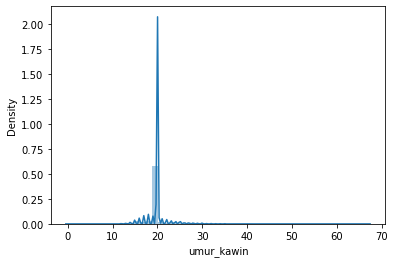

In [45]:
plot_dist('umur_kawin')

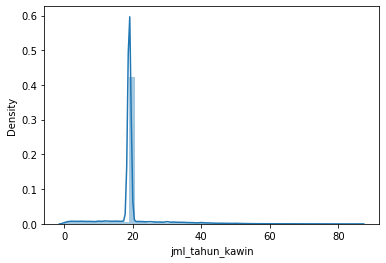

In [46]:
plot_dist('jml_tahun_kawin')

In [19]:
def imputer_numerical_fit(data_numerical):
    imput = SimpleImputer(
        missing_values = np.nan,
        strategy = "median")
    
    imput.fit(num_data)
    
    return imput

In [20]:
imputer_numerical = imputer_numerical_fit(num_data)

In [21]:
def imputer_numerical_transform(imputer_fitted,
                                numerical_data):
    num_data_imputted = imput.fit_transform(numerical_data)
    num_data_imputted = pd.DataFrame(num_data_imputted)
    num_data_imputted.columns = numerical_data.columns
    
    return num_data_imputted

In [49]:
quer1 = sus12_ki[sus12_ki['jenis_kelamin']==2]
quer1

,identifier_rt,individu,provinsi,kab_kota,desa_kota,umur,hubkel,jenis_kelamin,status_perkawinan,ijazah,umur_kawin,jml_tahun_kawin,pend_3bulan,bacatulis_Latin,bacatulis_Arab,bacatulis_Lainnya,internet,exp_cap,weight
1,110112500101601,2,11,1,1,30,2,2,2,8.0,23.0,7.0,2.0,1.0,1.0,2.0,2.0,3.434643e+05,45.876255
2,110112500101601,3,11,1,1,5,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,3.434643e+05,45.876255
5,110112500101602,2,11,1,1,33,2,2,2,2.0,22.0,11.0,2.0,1.0,1.0,2.0,2.0,5.703095e+05,55.252186
6,110112500101602,3,11,1,1,9,3,2,1,1.0,NaN,NaN,1.0,1.0,1.0,2.0,2.0,5.703095e+05,55.252186
7,110112500101602,4,11,1,1,5,3,2,1,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114433,947122001103809,2,94,71,2,39,2,2,2,2.0,19.0,20.0,2.0,1.0,2.0,2.0,2.0,7.117279e+05,14.112268
1114435,947122001103809,4,94,71,2,18,3,2,1,8.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,7.117279e+05,14.112268
1114440,947122001103810,2,94,71,2,37,2,2,2,8.0,25.0,12.0,1.0,1.0,2.0,1.0,1.0,1.348310e+06,6.000000
1114442,947122001103810,4,94,71,2,9,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000


In [55]:
556001-238210

317791

In [50]:
quer1['jenis_kelamin'].value_counts()

2    556001
Name: jenis_kelamin, dtype: int64

In [54]:
quer1['umur_kawin'].isnull().sum()

238210

In [56]:
def plot_dist4(variable_name):
    sns.distplot(quer1[variable_name])

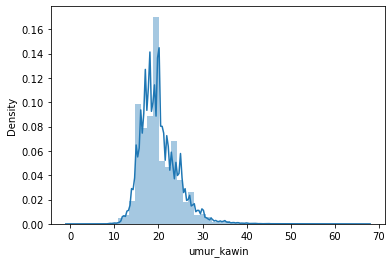

In [57]:
plot_dist4('umur_kawin')

In [60]:
quer1_empty = quer1['umur_kawin'].dropna(axis=0)
quer1_empty.isnull().sum()

0

In [60]:
quer2 = quer1.copy()
quer2

,identifier_rt,individu,provinsi,kab_kota,desa_kota,umur,hubkel,jenis_kelamin,status_perkawinan,ijazah,umur_kawin,jml_tahun_kawin,pend_3bulan,bacatulis_Latin,bacatulis_Arab,bacatulis_Lainnya,internet,exp_cap,weight
1,110112500101601,2,11,1,1,30,2,2,2,8.0,23.0,7.0,2.0,1.0,1.0,2.0,2.0,3.434643e+05,45.876255
2,110112500101601,3,11,1,1,5,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,3.434643e+05,45.876255
5,110112500101602,2,11,1,1,33,2,2,2,2.0,22.0,11.0,2.0,1.0,1.0,2.0,2.0,5.703095e+05,55.252186
6,110112500101602,3,11,1,1,9,3,2,1,1.0,NaN,NaN,1.0,1.0,1.0,2.0,2.0,5.703095e+05,55.252186
7,110112500101602,4,11,1,1,5,3,2,1,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114433,947122001103809,2,94,71,2,39,2,2,2,2.0,19.0,20.0,2.0,1.0,2.0,2.0,2.0,7.117279e+05,14.112268
1114435,947122001103809,4,94,71,2,18,3,2,1,8.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,7.117279e+05,14.112268
1114440,947122001103810,2,94,71,2,37,2,2,2,8.0,25.0,12.0,1.0,1.0,2.0,1.0,1.0,1.348310e+06,6.000000
1114442,947122001103810,4,94,71,2,9,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000


In [64]:
quer3 = quer2[quer2['umur_kawin']<18.0]
quer3

,identifier_rt,individu,provinsi,kab_kota,desa_kota,umur,hubkel,jenis_kelamin,status_perkawinan,ijazah,umur_kawin,jml_tahun_kawin,pend_3bulan,bacatulis_Latin,bacatulis_Arab,bacatulis_Lainnya,internet,exp_cap,weight
26,110112500101607,2,11,1,1,32,2,2,2,NaN,16.0,16.0,NaN,2.0,2.0,2.0,2.0,3.619762e+05,66.062210
51,110112500108203,2,11,1,1,37,2,2,2,5.0,17.0,20.0,2.0,1.0,1.0,2.0,2.0,2.762830e+05,64.323265
74,110112500108207,2,11,1,1,36,2,2,2,5.0,17.0,19.0,2.0,1.0,1.0,2.0,2.0,3.365405e+05,50.752403
86,110112500108209,2,11,1,1,35,2,2,2,1.0,16.0,19.0,2.0,1.0,2.0,2.0,2.0,3.060769e+05,64.323265
110,110112500202406,2,11,1,1,34,2,2,2,5.0,17.0,17.0,2.0,1.0,1.0,2.0,2.0,1.175712e+06,31.588346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114349,947122000602406,2,94,71,2,36,2,2,2,NaN,16.0,20.0,NaN,2.0,2.0,2.0,2.0,3.834921e+05,343.949554
1114360,947122000602408,1,94,71,2,30,1,2,3,1.0,17.0,13.0,2.0,1.0,2.0,2.0,2.0,8.845952e+05,6.000000
1114371,947122000902601,2,94,71,2,45,2,2,2,1.0,15.0,30.0,2.0,2.0,2.0,2.0,2.0,1.266143e+06,60.124115
1114382,947122000902604,4,94,71,2,65,7,2,4,1.0,16.0,41.0,2.0,1.0,2.0,1.0,2.0,6.925476e+05,33.320774


In [71]:
fill1 = quer3['hubkel']==3

In [72]:
fill2 = quer3['hubkel']==4

## Filter dataset sesuai kondisi yang diinginkan
1. jenis kelamin perempuan (jenis_kelamin)
2. berusia 18 tahun kebawah saat pernikahan pertama (umur_kawin)
3. hubkeluarga dengan kepala keluarga merupakan menantu dan anak